In [1]:
from pathlib import Path
import sys
import os
import PIL.Image
import json
from random import choices

ROOT_PATH = Path().resolve().parent
sys.path.insert(0, str(ROOT_PATH))
from src import *


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/leonardo_scratch/fast/IscrC_MACRO/Objaverse/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/leonardo/home/userexternal/vmorelli/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/leonardo_scratch/fast/IscrC_MACRO/Objaverse/.venv/lib/python3.11/site-packages/ipykernel/k

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Unable to initialise audio


ImportError: numpy.core.multiarray failed to import

# Preview captions from renders
[`generate_captions.py`](generate_captions.py) employs SOTA vision transformers (ViTs) to generate captions for the renders.
 
This notebook shows some samples.

The hyperparameters of the BLIP2 model that can be tweaked to improve the predictions are:

| Parameter        | Description                                                                                                                                               | Default |
| ---------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- | ------- |
| _Deterministic_|&nbsp;|
| `max_new_tokens` | Maximum number of tokens to generate beyond the prompt. Once this cap is reached, generation stops even without an end-of-sequence token.                 | `None`  |
| `num_beams`      | Number of beams for beam search. Higher values explore more candidate sequences (better quality but slower/more memory).                                  | `1`     |
| `length_penalty` | Exponent applied to sequence length during beam scoring. <1 favors longer outputs; >1 favors shorter ones.                                                | `1.0`   |
| `early_stopping` | If `True`, beam search stops when all beams hit end-of-sequence; if `False`, continues until `max_new_tokens` or best beam ends, rarely yielding a better overall score.                          | `False` |
|_Stochastic_|&nbsp;|
| `do_sample`      | If `True`, uses probabilistic sampling instead of deterministic (greedy or beam) decoding—introduces randomness for more varied outputs.                  | `False` |
| `temperature`    | Divides logits before softmax to adjust distribution sharpness. <1 makes choices more conservative; >1 makes them more random (only if `do_sample=True`). | `1.0`   |
| `top_p`          | Nucleus sampling threshold: keeps the smallest token set whose cumulative probability ≥ `top_p`, then samples from it. (Only if `do_sample=True`).        | `1.0`   |


In [2]:
paths = list((ROOT_PATH / "data/dataset/objaverse/render").glob("*.jpg"))
captions = json.load(open(ROOT_PATH / "data/dataset/objaverse/caption/captions.json"))

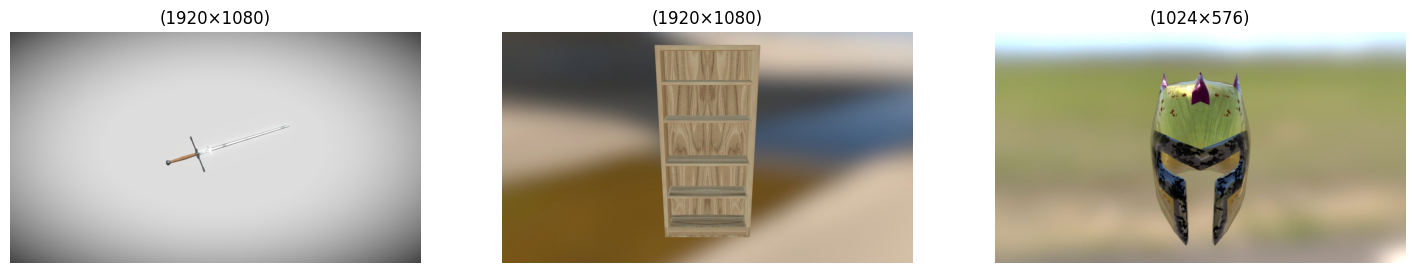

['3d model of a sword',
 'a tall wooden bookcase',
 'spartan helmet - spartan helmet 3d model']

In [6]:
indexes = choices(range(len(captions)), k=3)
selected_captions = [list(captions.items())[x] for x in indexes]
plot_images(
    [PIL.Image.open(ROOT_PATH / "data/dataset/objaverse/render" / f"{uid}.jpg") for uid, _ in selected_captions],
    cols=3,
    size=6,
)
[x for _, x in selected_captions]